In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/rbabu3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rbabu3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re #to remove the special characters in the text
from sklearn.feature_extraction.text import CountVectorizer
##importing models of the day
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score

In [16]:
data = pd.read_csv('text.csv')
data.sample(4)
data = data[0:416808]

Number of rows in the DataFrame: 416808


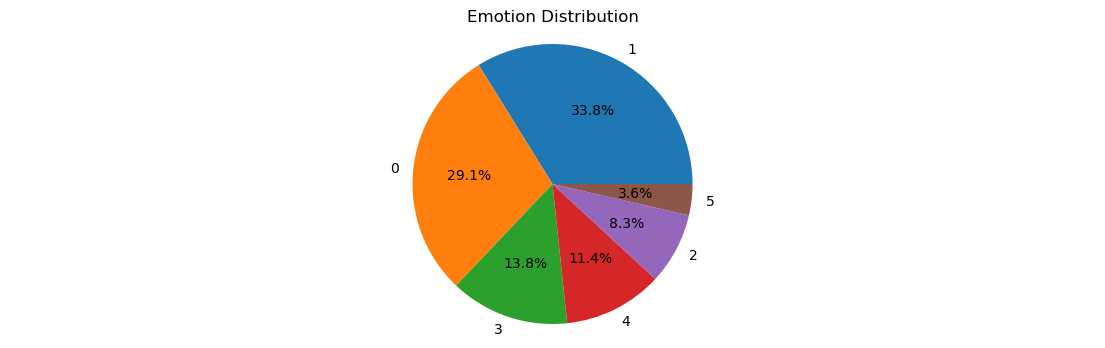

Accuracy: 0.9196876274561551


In [17]:

print(f'Number of rows in the DataFrame: {data.shape[0]}')
data.isna().sum()

# Rename and drop columns
data.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.sample(4)

# Visualize emotion distribution
plt.figure(figsize=(14, 4))
label_count = data['Label'].value_counts()
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')
plt.title('Emotion Distribution')
plt.axis('equal')
plt.show()

# Mapping emotion labels to sentiment labels
emotion_to_sentiment = {
    0: 0,  # sadness -> negative sentiment
    1: 1,  # joy/love -> neutral sentiment
    2: 1,
    3: 0,  # anger -> negative sentiment
    4: 2,  # fear/surprise -> positive sentiment
    5: 2
}
data['Label'] = data['Label'].map(emotion_to_sentiment)

# Preprocessing
pattern = r'[^a-zA-Z0-9\s]'
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
def preprocess(text):
    clean_text = re.sub(pattern, '', text)  # replace with empty string
    tokens = word_tokenize(clean_text)  # tokenize the given clean text
    filtered_token = [word for word in tokens if word.lower() not in stop_words]  # remove stop words
    stemmed_token = [ps.stem(word) for word in filtered_token]  # apply porter stemmer
    return ' '.join(stemmed_token)
data['Text'] = data['Text'].apply(preprocess)

# Vectorization
cv = CountVectorizer(max_features=5000)
cv.fit(data['Text'])
trf = cv.transform(data['Text'])
trf = trf.toarray()
X = trf
y = data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training and evaluation
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_preds = mnb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_preds))


In [18]:
# Sample Twitter texts
sample_texts = ["Wow!! This is unexpected",
            "I really don't wanna stay in my house tonight. It's so creepy out there",
            "But very unfortunately I am forced to take this decision due to my persisting tailbone injury which needs immediate attention. Will need all your support and good will to heal at the earliest, and come back to do more.",
              "I love you", "I'm so happy",
                "I'm so pissed right now",
                "I'm scared of snakes",
                "Don't over do that again",
                "I'm just so grateful for everything right now.", "It's just frustrating when you're not being heard.", "I can't believe they would do something like this. I'm livid.", 'Every moment with you is a treasure.', 'Wow, I did not see that coming at all!',
                'The sun is shining, and so is my heart.', 'This is just unfair and it makes my blood boil.', 'Every moment with you is a treasure.', "Love is in the air, and I'm here for it.", "I'm shocked, in a good way!",
                'The world feels a little dimmer today, missing you.', "I can't shake this feeling of dread.", "There's something about this place that just feels off.", "I can't believe I'm going through this again. It's heartbreaking.", 'Every time I think about it, I get angry all over again.',
                "I can't believe I'm going through this again. It's heartbreaking.", 'Every time I think about it, my heart just sinks.', "It's just frustrating when you're not being heard.", 'Every time I think about it, my heart just sinks.', 'Every time I think about it, my heart just sinks.',
                "It's just one of those days where everything feels harder than it should.", "There's something about this place that just feels off.", "It's just frustrating when you're not being heard.", "It's just one of those days where everything feels harder than it should.", 'Every shadow makes my heart race tonight.',
                "Your presence brings me such joy and peace, it's indescribable.",
    "Every moment with you feels like a dream I never want to wake up from.",
    "The way you look at me, with so much love and affection, melts my heart every time.",
    "Holding your hand feels like finding a piece of the universe that was made just for me.",
    "Your love is like a warm embrace on a cold winter's night, comforting and essential.",
     "With you, every place feels like home and every moment is a treasure.",
    "Your laughter is a melody that my heart wants to play on repeat.",
    "Being loved by you is a blessing I thank the stars for every night.",
    "Your eyes hold a universe I want to explore, filled with love and mysteries.",
    "Love is what we've been through together, and every struggle made it stronger.",
     "I never expected this turn of events, but I'm thrilled!",
    "The surprise party you threw for me was beyond my wildest dreams!",
    "Finding out the news left me in a state of shock and happiness.",
    "I was taken aback by the unexpected gift; it was such a pleasant surprise.",
    "The twist at the end of the story caught me completely off-guard.",
    "Never in a million years did I see that coming!",
    "The sudden revelation was a surprise that left me speechless.",
    "Discovering the hidden message was like uncovering a treasure.",
    "The moment you revealed the surprise, my heart skipped a beat.",
    "It was a shock to see everyone there, waiting to surprise me!",
     "The silence in the room felt heavier than usual, echoing my somber thoughts.",
    "Losing you has left a void in my heart that nothing seems to fill.",
    "Watching the sunset, I felt a loneliness that seemed to mirror my own.",
    "The news hit me like a cold wave, leaving a chill of sadness.",
    "It's hard to find the words to express the sorrow that's weighing on me.",
    "The empty chair at the table served as a painful reminder of what was lost.",
    "Tears were my silent response to a world that suddenly seemed too harsh.",
    "I miss you more with each passing day, and the pain doesn't seem to fade.",
    "The joy we once shared now feels like a distant memory, hard to grasp.",
    "Saying goodbye was the hardest thing I've ever had to do.",
     "The laughter that filled the room was contagious, bringing smiles to all.",
    "Finding that one person who gets you is like discovering a hidden treasure.",
    "The warmth of the sun on my face reminded me of the joy in simple things.",
    "Receiving the news brought a surge of happiness I hadn't felt in a while.",
    "The beauty of the world in bloom is enough to make anyone's heart lighter.",
    "Joy comes in moments, often unexpected, but always welcome.",
    "Seeing your smile is all it takes to make my day infinitely better.",
    "The thrill of achievement is a high that nothing else can match.",
    "Happiness is finding peace in the chaos, a quiet moment of contentment.",
    "There's a unique joy in making someone else smile, a warmth that spreads.",
     "Every shadow in the dark seemed to whisper my name, heightening my fear.",
    "The thought of losing everything I hold dear terrifies me beyond words.",
    "Hearing the howl of the wind, I felt as if danger was lurking around every corner.",
    "The uncertainty of what lies ahead fills me with a deep, unsettling fear.",
    "My heart races at the thought of facing my deepest fears alone.",
    "There's something about the silence of the night that amplifies my fears.",
    "The creaking of the floorboards in an empty house sends shivers down my spine.",
    "I'm haunted by the fear that I may never find my way back to where I belong.",
    "The fear of failure looms over me, a constant shadow that I can't seem to escape.",
    "Being trapped in a place with no escape is the stuff of my nightmares.",
    "The injustice of the situation filled me with an intense rage.",
    "Every time I think about the betrayal, a fierce anger bubbles up inside me.",
    "The frustration of being powerless in that moment turned into seething anger.",
    "Feeling overlooked and undervalued ignited a spark of anger in me.",
    "The blatant disrespect shown to me was enough to make my blood boil.",
    "I clenched my fists in anger, struggling to calm the storm within.",
    "The constant noise was driving me to the edge, my patience turning to anger.",
    "Seeing the unfairness unfold before my eyes, my temper flared uncontrollably.",
    "Their words were like fuel to the fire of my anger, making it burn brighter.",
    "The more I tried to let it go, the stronger my anger grew, consuming my thoughts.",
    "The eerie silence of the forest made every sound seem like a threat.",
    "Lying awake at night, I imagined all sorts of horrors lurking in the dark.",
    "The thought of being watched when I was alone sent a chill through me.",
    "Hearing footsteps behind me in the empty street made my heart race with fear.",
    "The fear of the unknown had always been a powerful, paralyzing force.",
    "Seeing shadows move in the darkness filled me with an irrational fear.",
    "The old, abandoned house seemed to hold secrets that were better left undiscovered."


]

# Preprocess the sample texts
preprocessed_samples = [preprocess(text) for text in sample_texts]

# Vectorize the preprocessed texts using the existing CountVectorizer cv
sample_vectors = cv.transform(preprocessed_samples).toarray()

# Predict sentiments for the sample texts using the trained model
predicted_sentiments = mnb.predict(sample_vectors)

# Map sentiment labels back to emotions
sentiment_to_emotion = {
    0: 'Negative',
    1: 'Neutral',
    2: 'Positive'
}

predicted_emotions = []
# Print the predicted emotions for each sample text
for text, sentiment in zip(sample_texts, predicted_sentiments):
    predicted_emotion = sentiment_to_emotion[sentiment]
    predicted_emotions.append(predicted_emotion)
#    print(f'Text: {text}\nPredicted Emotion: {predicted_emotion}\n')

In [19]:
from sklearn.metrics import accuracy_score

# Assuming 'pipeline' is your trained model including the TF-IDF vectorizer and logistic regression

# Example new data
new_data = ["Wow!! This is unexpected",
            "I really don't wanna stay in my house tonight. It's so creepy out there",
            "But very unfortunately I am forced to take this decision due to my persisting tailbone injury which needs immediate attention. Will need all your support and good will to heal at the earliest, and come back to do more.",
              "I love you", "I'm so happy",
                "I'm so pissed right now", 
                "I'm scared of snakes", 
                "Don't over do that again",
                "I'm just so grateful for everything right now.", "It's just frustrating when you're not being heard.", "I can't believe they would do something like this. I'm livid.", 'Every moment with you is a treasure.', 'Wow, I did not see that coming at all!',
                'The sun is shining, and so is my heart.', 'This is just unfair and it makes my blood boil.', 'Every moment with you is a treasure.', "Love is in the air, and I'm here for it.", "I'm shocked, in a good way!",
                'The world feels a little dimmer today, missing you.', "I can't shake this feeling of dread.", "There's something about this place that just feels off.", "I can't believe I'm going through this again. It's heartbreaking.", 'Every time I think about it, I get angry all over again.',
                "I can't believe I'm going through this again. It's heartbreaking.", 'Every time I think about it, my heart just sinks.', "It's just frustrating when you're not being heard.", 'Every time I think about it, my heart just sinks.', 'Every time I think about it, my heart just sinks.',
                "It's just one of those days where everything feels harder than it should.", "There's something about this place that just feels off.", "It's just frustrating when you're not being heard.", "It's just one of those days where everything feels harder than it should.", 'Every shadow makes my heart race tonight.',
                "Your presence brings me such joy and peace, it's indescribable.",
    "Every moment with you feels like a dream I never want to wake up from.",
    "The way you look at me, with so much love and affection, melts my heart every time.",
    "Holding your hand feels like finding a piece of the universe that was made just for me.",
    "Your love is like a warm embrace on a cold winter's night, comforting and essential.",
     "With you, every place feels like home and every moment is a treasure.",
    "Your laughter is a melody that my heart wants to play on repeat.",
    "Being loved by you is a blessing I thank the stars for every night.",
    "Your eyes hold a universe I want to explore, filled with love and mysteries.",
    "Love is what we've been through together, and every struggle made it stronger.",
     "I never expected this turn of events, but I'm thrilled!",
    "The surprise party you threw for me was beyond my wildest dreams!",
    "Finding out the news left me in a state of shock and happiness.",
    "I was taken aback by the unexpected gift; it was such a pleasant surprise.",
    "The twist at the end of the story caught me completely off-guard.",
    "Never in a million years did I see that coming!",
    "The sudden revelation was a surprise that left me speechless.",
    "Discovering the hidden message was like uncovering a treasure.",
    "The moment you revealed the surprise, my heart skipped a beat.",
    "It was a shock to see everyone there, waiting to surprise me!",
     "The silence in the room felt heavier than usual, echoing my somber thoughts.",
    "Losing you has left a void in my heart that nothing seems to fill.",
    "Watching the sunset, I felt a loneliness that seemed to mirror my own.",
    "The news hit me like a cold wave, leaving a chill of sadness.",
    "It's hard to find the words to express the sorrow that's weighing on me.",
    "The empty chair at the table served as a painful reminder of what was lost.",
    "Tears were my silent response to a world that suddenly seemed too harsh.",
    "I miss you more with each passing day, and the pain doesn't seem to fade.",
    "The joy we once shared now feels like a distant memory, hard to grasp.",
    "Saying goodbye was the hardest thing I've ever had to do.",
     "The laughter that filled the room was contagious, bringing smiles to all.",
    "Finding that one person who gets you is like discovering a hidden treasure.",
    "The warmth of the sun on my face reminded me of the joy in simple things.",
    "Receiving the news brought a surge of happiness I hadn't felt in a while.",
    "The beauty of the world in bloom is enough to make anyone's heart lighter.",
    "Joy comes in moments, often unexpected, but always welcome.",
    "Seeing your smile is all it takes to make my day infinitely better.",
    "The thrill of achievement is a high that nothing else can match.",
    "Happiness is finding peace in the chaos, a quiet moment of contentment.",
    "There's a unique joy in making someone else smile, a warmth that spreads.",
     "Every shadow in the dark seemed to whisper my name, heightening my fear.",
    "The thought of losing everything I hold dear terrifies me beyond words.",
    "Hearing the howl of the wind, I felt as if danger was lurking around every corner.",
    "The uncertainty of what lies ahead fills me with a deep, unsettling fear.",
    "My heart races at the thought of facing my deepest fears alone.",
    "There's something about the silence of the night that amplifies my fears.",
    "The creaking of the floorboards in an empty house sends shivers down my spine.",
    "I'm haunted by the fear that I may never find my way back to where I belong.",
    "The fear of failure looms over me, a constant shadow that I can't seem to escape.",
    "Being trapped in a place with no escape is the stuff of my nightmares.",
    "The injustice of the situation filled me with an intense rage.",
    "Every time I think about the betrayal, a fierce anger bubbles up inside me.",
    "The frustration of being powerless in that moment turned into seething anger.",
    "Feeling overlooked and undervalued ignited a spark of anger in me.",
    "The blatant disrespect shown to me was enough to make my blood boil.",
    "I clenched my fists in anger, struggling to calm the storm within.",
    "The constant noise was driving me to the edge, my patience turning to anger.",
    "Seeing the unfairness unfold before my eyes, my temper flared uncontrollably.",
    "Their words were like fuel to the fire of my anger, making it burn brighter.",
    "The more I tried to let it go, the stronger my anger grew, consuming my thoughts.",
    "The eerie silence of the forest made every sound seem like a threat.",
    "Lying awake at night, I imagined all sorts of horrors lurking in the dark.",
    "The thought of being watched when I was alone sent a chill through me.",
    "Hearing footsteps behind me in the empty street made my heart race with fear.",
    "The fear of the unknown had always been a powerful, paralyzing force.",
    "Seeing shadows move in the darkness filled me with an irrational fear.",
    "The old, abandoned house seemed to hold secrets that were better left undiscovered."
                ]
actual_labels = [5,4,0, 2, 1, 3, 4, 3, 1, 3, 3, 2, 5, 1, 3, 2, 2, 5, 0, 4,
                  4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 3, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                  5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                  3, 3, 3, 3, 3, 3, 3, 3, 3, 3,4, 4, 4, 4, 4, 4, 4]  # Replace with actual labels for new data


mapping={0:'Sad',1:'Joy',2:'Love',3:'Anger',4:'Fear',5:'Surprise'}
print("Sample Tweet:",len(actual_labels))
print()

new_mapping={0:'Negative',1:'Positive',2:'Neutral'}

def reduceLabels(text):
    # print(type(text))
    if text==0 or text==3:
        return 0
    elif text==1 or text==2:
        return 1
    elif text==4 or text==5:
        return 2
    return 2



for i in range(len(actual_labels)):
    actual_labels[i]=reduceLabels(actual_labels[i])

Sample Tweet: 100



In [25]:
# Preprocess the sample texts
preprocessed_samples = [preprocess(text) for text in new_data]

# Vectorize the preprocessed texts using the existing CountVectorizer cv
sample_vectors = cv.transform(preprocessed_samples).toarray()

# Predict sentiments for the sample texts using the trained model
predictions = mnb.predict(sample_vectors)

# Calculate and print the accuracy
accuracy = accuracy_score(actual_labels, predictions)

print(f'Accuracy: {accuracy}')


print()

# To see the predictions alongside the actual labels
# for pred, actual in zip(predictions, actual_labels):
#     print(f'Predicted: {mapping[pred]}, Actual: {mapping[actual]}')

Accuracy: 0.79

